In [ ]:
!pip install pyrdf2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp310-cp310-linux_x86_64.whl size=159971 sha256=

In [ ]:
pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

In [ ]:
# Read a CSV file containing the entities we want to classify.
data = pd.read_csv("entities.tsv", sep="\t")
entities = [entity for entity in data["location"]]
print(entities)
# [
#    "http://dbpedia.org/resource/Belgium",
#    "http://dbpedia.org/resource/France",
#    "http://dbpedia.org/resource/Germany",
# ]

['http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Germany', 'http://dbpedia.org/resource/Australia', 'http://dbpedia.org/resource/New_Zealand', 'http://dbpedia.org/resource/Peru', 'http://dbpedia.org/resource/Sri_Lanka', 'http://dbpedia.org/resource/Cyprus', 'http://dbpedia.org/resource/Spain', 'http://dbpedia.org/resource/Portugal', 'http://dbpedia.org/resource/Russia', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Berlin', 'http://dbpedia.org/resource/Canberra', 'http://dbpedia.org/resource/Wellington', 'http://dbpedia.org/resource/Lima', 'http://dbpedia.org/resource/Nicosia', 'http://dbpedia.org/resource/Colombo', 'http://dbpedia.org/resource/Madrid', 'http://dbpedia.org/resource/Lisbon', 'http://dbpedia.org/resource/Moscow']


In [ ]:


# Define our knowledge graph (here: DBPedia SPARQL endpoint).
knowledge_graph = KG(
    "https://dbpedia.org/sparql",
    skip_predicates={"www.w3.org/1999/02/22-rdf-syntax-ns#type"},
    literals=[
        [
            "http://dbpedia.org/ontology/wikiPageWikiLink",
            "http://www.w3.org/2004/02/skos/core#prefLabel",
        ],
        ["http://dbpedia.org/ontology/humanDevelopmentIndex"],
    ],
)
# Create our transformer, setting the embedding & walking strategy.
transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],
    # verbose=1
)
# Get our embeddings.
embeddings, literals = transformer.fit_transform(knowledge_graph, entities)
print(embeddings)


print(literals)


[array([-0.00255146, -0.00386263,  0.0103146 , -0.00849951,  0.00407019,
        0.00339927, -0.00078116,  0.01072035,  0.00854057, -0.00640742,
       -0.00545278, -0.00874746, -0.00746943, -0.00207055, -0.0050067 ,
       -0.00964842,  0.00162182,  0.00258957,  0.00591129, -0.00462551,
       -0.00409473,  0.00184991,  0.00229412,  0.00749691,  0.00057314,
        0.00715313, -0.00926242,  0.00780758, -0.00319953,  0.00902536,
       -0.00600345,  0.00246937,  0.00204143, -0.00175811, -0.00595415,
       -0.00846103, -0.00711199, -0.0088978 ,  0.00093682, -0.0009992 ,
       -0.00216145,  0.00678244, -0.00331309, -0.00130841, -0.00790299,
       -0.01059828,  0.00811817, -0.00620534, -0.00633541,  0.00599955,
        0.00691684, -0.00809947, -0.00059789, -0.00630735,  0.00143634,
       -0.00476666, -0.00243376,  0.00163509,  0.00755801,  0.00687131,
       -0.00961155, -0.00561049,  0.00811993,  0.00181215, -0.00583913,
        0.00193072,  0.0096473 , -0.00055235, -0.0112282 ,  0.0

In [ ]:
import rdflib

# Read a CSV file containing the entities we want to classify.
data = pd.read_csv("entities.tsv", sep="\t")
entities = [entity for entity in data["location"]]
#print(entities)

# We will exclude triples (s, p, o) with p in label_predicates from our KG
# as these do not carry any useful information.
label_predicates = [
     'http://dbpedia.org/ontology/abstract',
     'http://dbpedia.org/ontology/flag',
     'http://dbpedia.org/ontology/thumbnail',
     'http://dbpedia.org/ontology/wikiPageExternalLink',
     'http://dbpedia.org/ontology/wikiPageID',
     'http://dbpedia.org/ontology/wikiPageRevisionID',
     'http://dbpedia.org/ontology/wikiPageWikiLink',
     'http://dbpedia.org/property/flagCaption',
     'http://dbpedia.org/property/float',
     'http://dbpedia.org/property/footnoteA',
     'http://dbpedia.org/property/footnoteB',
     'http://dbpedia.org/property/footnoteC',
     'http://dbpedia.org/property/source',
     'http://dbpedia.org/property/width',
     'http://purl.org/dc/terms/subject',
     'http://purl.org/linguistics/gold/hypernym',
     'http://purl.org/voc/vrank#hasRank',
     'http://www.georss.org/georss/point',
     'http://www.w3.org/2000/01/rdf-schema#comment',
     'http://www.w3.org/2000/01/rdf-schema#label',
     'http://www.w3.org/2000/01/rdf-schema#seeAlso',
     'http://www.w3.org/2002/07/owl#sameAs',
     'http://www.w3.org/2003/01/geo/wgs84_pos#geometry',
     'http://dbpedia.org/ontology/wikiPageRedirects',
     'http://www.w3.org/2003/01/geo/wgs84_pos#lat',
     'http://www.w3.org/2003/01/geo/wgs84_pos#long',
     'http://www.w3.org/2004/02/skos/core#exactMatch',
     'http://www.w3.org/ns/prov#wasDerivedFrom',
     'http://xmlns.com/foaf/0.1/depiction',
     'http://xmlns.com/foaf/0.1/homepage',
     'http://xmlns.com/foaf/0.1/isPrimaryTopicOf',
     'http://xmlns.com/foaf/0.1/name',
     'http://dbpedia.org/property/website',
     'http://dbpedia.org/property/west',
     'http://dbpedia.org/property/wordnet_type',
     'http://www.w3.org/2002/07/owl#differentFrom',
]

# KG Loading Alternative 2: Using a dbpedia endpoint (nothing is loaded into memory)
kg = KG("https://dbpedia.org/sparql", is_remote=True,
        skip_predicates=[rdflib.URIRef(x) for x in label_predicates])

# Make sure that every entity can be found in our KG
filtered_entities = [e for e in entities if e in kg._entities]
not_found = set(entities) - set(filtered_entities)
print(f'{not_found} could not be found in the KG! Removing them...')


{'http://dbpedia.org/resource/Russia', 'http://dbpedia.org/resource/Spain', 'http://dbpedia.org/resource/Sri_Lanka', 'http://dbpedia.org/resource/Berlin', 'http://dbpedia.org/resource/Canberra', 'http://dbpedia.org/resource/Madrid', 'http://dbpedia.org/resource/Cyprus', 'http://dbpedia.org/resource/Portugal', 'http://dbpedia.org/resource/Paris', 'http://dbpedia.org/resource/Lisbon', 'http://dbpedia.org/resource/Peru', 'http://dbpedia.org/resource/Brussels', 'http://dbpedia.org/resource/Colombo', 'http://dbpedia.org/resource/France', 'http://dbpedia.org/resource/Nicosia', 'http://dbpedia.org/resource/New_Zealand', 'http://dbpedia.org/resource/Moscow', 'http://dbpedia.org/resource/Wellington', 'http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/Australia', 'http://dbpedia.org/resource/Lima', 'http://dbpedia.org/resource/Germany'} could not be found in the KG! Removing them...


In [ ]:
import numpy as np

transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],
    # verbose=1
)
# Get our embeddings.
embeddings, literals = transformer.fit_transform(kg, entities)


print(len(entities), np.array(embeddings).shape)

22 (22, 100)


In [ ]:
X_embeddings = np.array(embeddings)
X_embeddings.shape

(22, 100)

In [ ]:
pip install adjustText

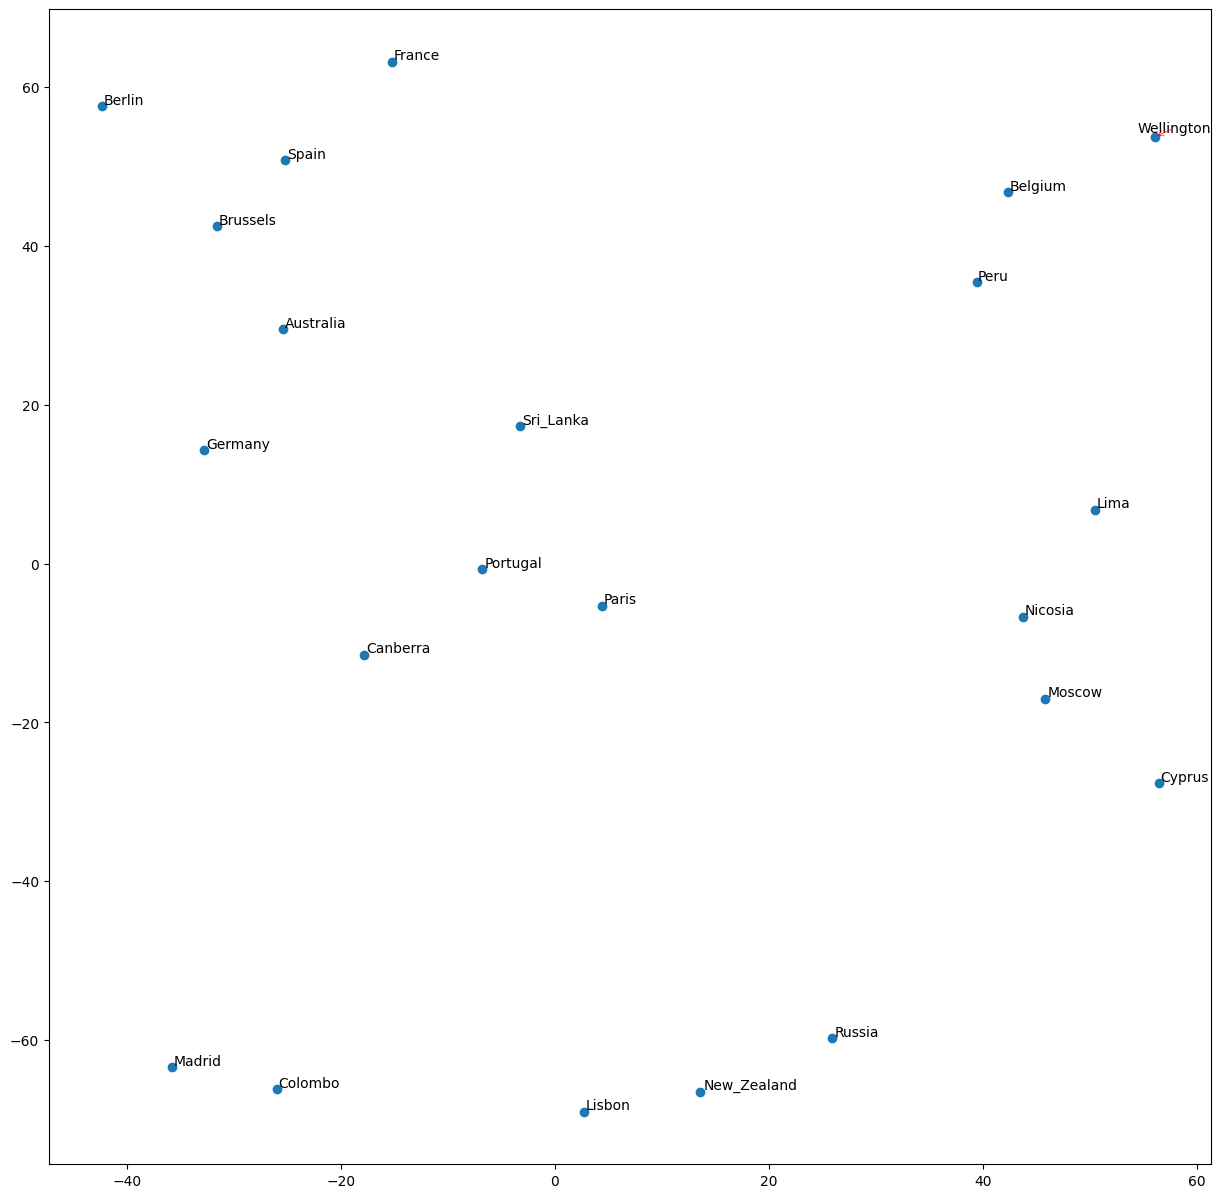

In [ ]:
# used for dimension reduction and visualization
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text

walk_tsne = TSNE(random_state=42, perplexity=3)
X_tsne = walk_tsne.fit_transform(X_embeddings)

plt.figure(figsize=(15, 15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], entities):
    lab = lab.split('/')[-1]
    text = plt.text(x, y, lab)
    texts.append(text)

adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()